# **IMPORTING LIBRARIES**

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# **LOADING THE TRAINED MODEL**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cnn = tf.keras.models.load_model("/content/drive/MyDrive/trained_model.h5")

# VISUALIZATION AND PREEDICTION

**VISUALIZE THE TEST IMAGE**

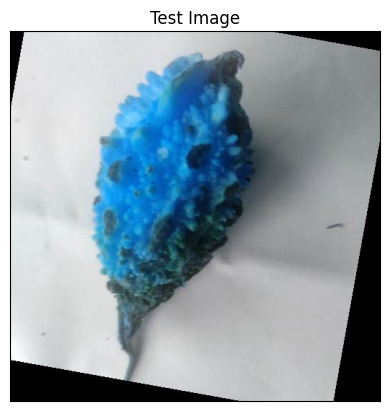

In [ ]:
import cv2
image_path="/content/drive/MyDrive/TEST OF FRUIT QUALITY DATASET/stale_bitter_groud/IMG_20200825_144553.jpg_0_4294.jpg"
a = cv2.imread(image_path)
plt.imshow(a)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

**PREDICITION**



1.   CONVERTING THE IMAGE TO ARRAY BECAUSE MODEL WILL ONLY TAKE NUMERIC VALUES
2.   CONVERTING THE ARRAY INTO NUMPY ARRAY
3.   [] is used because converting the array in 2D



In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_array = tf.keras.preprocessing.image.img_to_array(image)
input_array = np.array([input_array])
predictions = cnn.predict(input_array)

1/1 [==============================] - 1s 540ms/step


PRINTING THE PREDICTION RESULTS

In [ ]:
print(predictions)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


#PREPROCESSING THE TEST DATA SET

In [ ]:
ds_test = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/TEST OF FRUIT QUALITY DATASET",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=123,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 120 files belonging to 12 classes.


In [ ]:
ds_test.class_names

['fresh_apple',
 'fresh_banana',
 'fresh_bitter_gourd',
 'fresh_capsicum',
 'fresh_orange',
 'fresh_tomato',
 'stale_apple',
 'stale_banana',
 'stale_bitter_groud',
 'stale_capsicum',
 'stale_orange',
 'stale_tomato']

In [ ]:
result_index = np.where(predictions[0] == max(predictions[0]))

In [ ]:
print(result_index[0])

[8]


display image

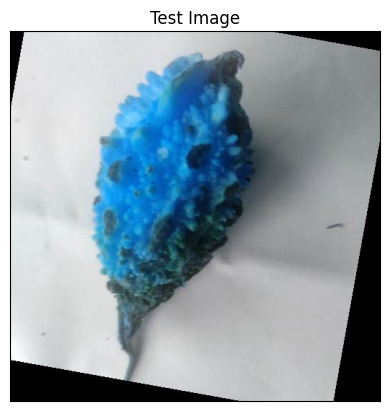

In [ ]:
plt.imshow(a)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#PREDICTED RESULT

In [ ]:
print('{}'.format(ds_test.class_names[result_index[0][0]]))

stale_bitter_groud


NOTES :


1.   IF THE TRAINING LOSS IS NOT DECREASING THEN, MODEL IS UNDERFITTING
2.   IF THE VALIDATION LOSS IS NOT DECREASING AND TRAINING LOSS IS DECREASED, THE MODEL IS OVERFITTING.
